# Deep Unsupervised Learning course, HSE, fall-winter 2019
## HW 01
### Student: Igor Tukh

In [270]:
import numpy as np
import torch
import torch.optim
import matplotlib.pyplot as plt

In [332]:
from sklearn.model_selection import train_test_split
from collections import defaultdict

### 1) Warmup

In [322]:
def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

In [323]:
data = sample_data()
train_data, test_data = train_test_split(data, train_size=0.8, shuffle=False, random_state=239239)

In [324]:
test_data = torch.from_numpy(test_data) - 1
train_data = torch.from_numpy(train_data) - 1

In [325]:
batch_size = 200
batches = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

In [326]:
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: torch.Size([8000])
Test data shape: torch.Size([2000])


In [327]:
softmax = torch.nn.LogSoftmax(dim=0)

def get_probabilities(params):
    return softmax(params)

In [328]:
epochs_number = 200

In [329]:
thetas = torch.zeros(100, requires_grad=True)
optimizer = torch.optim.SGD([thetas], lr=0.001)
loss_function = torch.nn.NLLLoss(reduction='mean')

losses = []
test_losses = []

for epoch in range(epochs_number):
    optimizer.zero_grad()
    for batch in batches:
        loss = loss_function(get_probabilities(thetas).repeat(batch.shape[0], 1), batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss)
        losses.append(loss)
    
        with torch.no_grad():
            test_losses.append(loss_function(get_probabilities(thetas).repeat(test_data.shape[0], 1), test_data))
    if epoch % 25 == 0 or epoch == epochs_number - 1:
        print(f'Epoch: {epoch}, loss: {losses[-1]}, test loss: {test_losses[-1]}')

Epoch: 0, loss: 4.596482753753662, test loss: 4.595321178436279
Epoch: 25, loss: 4.415656566619873, test loss: 4.39877986907959
Epoch: 50, loss: 4.309189319610596, test loss: 4.280674934387207
Epoch: 75, loss: 4.2485032081604, test loss: 4.2119340896606445
Epoch: 100, loss: 4.21200704574585, test loss: 4.170124530792236
Epoch: 125, loss: 4.188016414642334, test loss: 4.142709255218506
Epoch: 150, loss: 4.1709699630737305, test loss: 4.123466491699219
Epoch: 175, loss: 4.1581711769104, test loss: 4.109304428100586
Epoch: 199, loss: 4.148552894592285, test loss: 4.09889030456543


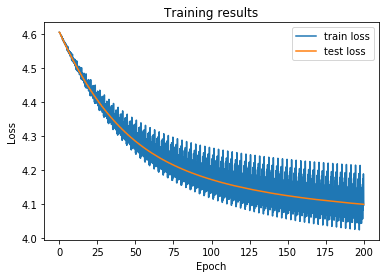

In [330]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training results')
epochs = np.arange(len(losses)) / round(len(losses) / batch_size) 
plt.plot(epochs[::3], losses[::3], label = 'train loss')
plt.plot(epochs[::3], test_losses[::3], label = 'test loss')
plt.legend()
plt.show()

Let's visualize emperical distribution.

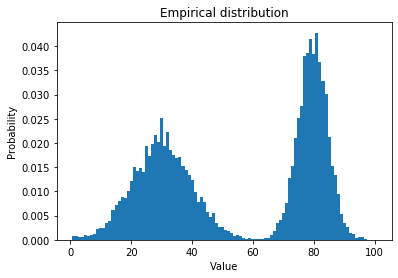

In [337]:
freqs = defaultdict(lambda: 0)
for x in data:
    freqs[x] += 1. / data.shape[0]

plt.clf()
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Empirical distribution')
simple_softmax = torch.nn.Softmax(dim=0)
plt.bar(range(1, 101), [freqs[key] for key in range(1, 101)], width=1)
plt.show()

Let's visualize predicted probabilities.

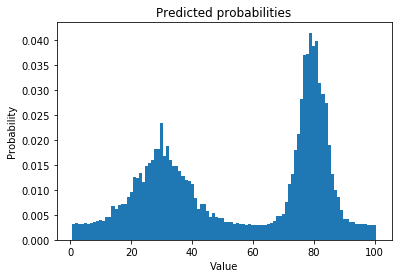

In [331]:
plt.clf()
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Predicted probabilities')
simple_softmax = torch.nn.Softmax(dim=0)
plt.bar(range(1, 101), simple_softmax(thetas).detach().numpy(), width=1)
plt.show()

As we can see, distributions are more or less the same.